In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns             # heatmap
import matplotlib.pyplot as plt   # heatmap
import altair as alt              # histograma e scatterplot
from plotnine import *            # scatterplot

In [ ]:
# Fazendo a conexao com o google drive (aula Mineracao)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lendo os dados

path = "XXX" 

arq_desp = "despesas_2020_abridged.txt"
d2020 = pd.read_csv(path + arq_desp, 
                    delimiter = ',', 
                    encoding = 'UTF-8', 
                    decimal = ".")


arq_desp = "despesas_2016_abridged.txt"
d2016 = pd.read_csv(path + arq_desp, 
                    sep = '\t', 
                    delimiter = ',', 
                    encoding = 'UTF-8', 
                    decimal = ".") 

#arq_pref = "prefeitos_2020_abridged.txt"
#arq_res = "results_2020_abridged.txt"
#pref = pd.read_csv(path + arq_pref, delimiter = ',', encoding = 'latin1', decimal = ".")
#res = pd.read_csv(path + arq_res, delimiter = ',', encoding = 'latin1', decimal = ".")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
d2020.head(3)

In [ ]:
# primeiro, verificar as categorias.
cat_2016 = d2016['type'].unique() 
len(cat_2016)
#print(sorted(cat_2016)) #coloca em ordem alfabética
# Criação e inclusão de páginas na internet

68

2016: Criação e inclusão de páginas na internet

In [ ]:
cat_2020 = d2020['desc_geral'].unique()
#len(cat_2020)
#print(sorted(cat_2020))

# Despesa com Impulsionamento de Conteúdos

2020: 

*   Criação e inclusão de páginas na internet
*   Despesa com Impulsionamento de Conteúdos



### CRIANDO VARIÁVEL BINARIA PARA ENTRADA COM WEB

In [ ]:
# Criar uma lista com valores que nos interessam para cada coluna
web = ['Criação e inclusão de páginas na internet',
       'Despesa com Impulsionamento de Conteúdos']

In [ ]:
# Se o tipo de gasto é um dos descritos marcar como 1 e 0 caso contrário
d2016['web'] = d2016['type'].isin(web).astype(int)
d2016.head(3)

,x,election,desc,date_processing,cand_seq,uf,muni_code,muni,party,cand_number,office,name_cand,cpf,cpf_vice,type_doc,number_doc,cpf_cnpf_supplier,name_supplier,name_supplier_irs,cod_econ_supplier,sector_supplier,date_expense,value,type,desc_expense,web
1,220,Eleições Municipais 2016,02/06/2018 06:13:40,25484121000187,10000001618,AC,1040,MARECHAL THAUMATURGO,PMDB,15,Prefeito,ISAAC DA SILVA PIYÃKO,43481221215,70304955272,Recibo,16,80724795200,MARIA MARCILEIDE COSTA DA SILVA,MARIA MARCILEIDE COSTA DA SILVA,#NULO,#NULO,18/09/201600:00:00,1000.0,Serviços prestados por terceiros,SERVIÇOS PRESTADOS COMO COZINHEIRA DE CAMPANHA...,0
2,220,Eleições Municipais 2016,02/06/2018 06:13:40,25513066000106,10000001938,AC,1074,CRUZEIRO DO SUL,PSB,40,Prefeito,CARLA IVANE DE BRITTO,4097119427,65411153204,#NULO,#NULO,25626031000183,ELEICAO 2016 FRANCISCO DA SILVA MEDEIROS VEREADOR,ELEICAO 2016 FRANCISCO DA SILVA MEDEIROS VEREADOR,9492800,Atividades de organizações políticas,21/09/201600:00:00,230.0,Doações financeiras a outros candidatos/partidos,#NULO,0
3,220,Eleições Municipais 2016,02/06/2018 06:13:40,25513066000106,10000001938,AC,1074,CRUZEIRO DO SUL,PSB,40,Prefeito,CARLA IVANE DE BRITTO,4097119427,65411153204,#NULO,#NULO,25647582000123,ELEICAO 2016 FRANCISCO ALBECIR BRITO DA SILVA ...,ELEICAO 2016 FRANCISCO ALBECIR BRITO DA SILVA ...,9492800,Atividades de organizações políticas,13/09/201600:00:00,270.0,Doações financeiras a outros candidatos/partidos,#NULO,0


In [ ]:
# Se o tipo de gasto é um dos descritos marcar como 1 e 0 caso contrário
d2020['web'] = d2020['desc_geral'].isin(web).astype(int)
d2020.head(3)

,ano,cargo,turno,uf,muni_code,muni,cnpj_campanha,numero_cand,nome_cand,cpf_cand,partido,cpf_cnpj_fornecedor,nome_fornecedor,cod_origem_despesa,desc_geral,desc_detalhe,valor,web
1,2020,Prefeito,1,AC,1490,XAPURI,39090681000161,11,CARLA VELOSO TAVARES,43475710200,PP,3295513295,ELIZETE DOS SANTOS PACHECO,20800000,Atividades de militância e mobilização de rua,CONTRATO DE MILITANTE DE RUA,600.0,0
2,2020,Prefeito,1,AC,1490,XAPURI,39090681000161,11,CARLA VELOSO TAVARES,43475710200,PP,3802077296,SAMUEL LIMA DA SILVA,20800000,Atividades de militância e mobilização de rua,CONTRATO DE MILITANTE DE RUA,600.0,0
3,2020,Prefeito,1,AC,1074,CRUZEIRO DO SUL,38681893000150,15,FAGNER ROJAS SALES,72816082253,MDB,13347016000117,FACEBOOK SERVICOS ONLINE DO BRASIL LTDA.,20420000,Despesa com Impulsionamento de Conteúdos,IMPULSIONAMENTO,130.0,1


### Métricas para apresentação

#### Somas das Despesas

In [ ]:
desp_web_16 = d2016.query('web == 1')['value'].agg('sum')
desp_web_16

7276512.2

In [ ]:
desp_tot_16 = d2016['value'].agg('sum')
desp_tot_16

1624253028.3500006

In [ ]:
(desp_web_16/desp_tot_16)*100

0.447991296491031

In [ ]:
desp_tot_20 = d2020['valor'].agg('sum')
desp_tot_20

2001581029.5100005

In [ ]:
desp_web_20 = d2020.query('web == 1')['valor'].agg('sum')
desp_web_20

70831158.23

In [ ]:
(desp_web_20/desp_tot_20)*100

3.5387604691347376

In [ ]:
((desp_web_20/desp_tot_20))/(desp_web_16/desp_tot_16)

7.8991723652952395

### Grupo trat e controle

In [ ]:
# Lendo os dados dos bolsonaristas 
path = "/content/drive/My Drive/INSPER/02_sem/Inf_Causal/Trabalho/dados/" 

df_cid_bolso = pd.read_csv(path + "df_psl_total.csv")
df_cid_bolso.head(2)
# Excluir algumas colunas
df_cid_bolso = df_cid_bolso[["CD_MUNICIPIO", "proporcao", "bolso_cat"]] 

### CRIANDO VARIÁVEIS **TOTAL DE DESPESA** E **TOTAL DE DESPESA COM WEB**

### 2016

In [ ]:
# Total das despesas por municipio e UF
total_muni_uf_16 = d2016.groupby(['muni_code', 'uf'], as_index = False).agg({"value": "sum"})
total_muni_uf_16 = total_muni_uf_16.sort_values(by = "value", ascending = True)
#total_muni_uf_16.query('muni_code == 1058')

,muni_code,uf,value
57,1058,AC,163966.89


In [ ]:
# Total das despesas WEB por municipio e UF
web_muni_uf_16 = d2016.query('web == 1').groupby(['muni_code', 'uf'], as_index = False).agg({"value": "sum"})
web_muni_uf_16 = web_muni_uf_16.sort_values(by = "value", ascending = True)
#web_muni_uf_16.query('muni_code == 1058')
web_muni_uf_16['value'] = web_muni_uf_16['value'].fillna(0)
web_muni_uf_16.sort_values(by = "value", ascending = True)

,muni_code,uf,value
716,86290,RS,30.00
199,36510,BA,30.00
649,80616,SC,30.00
204,36854,BA,30.00
4,671,RO,30.00
...,...,...,...
409,58653,RJ,305000.00
58,13897,CE,321172.71
245,41238,MG,394115.50
573,73440,TO,570000.00


In [ ]:
muni_uf_16 = pd.merge(total_muni_uf_16, 
                      web_muni_uf_16, 
                      on = ['muni_code', 'uf'], 
                      how = "left")

In [ ]:
muni_uf_16 = muni_uf_16.rename({'value_x':'valor_total', 'value_y':'valor_web'}, axis = 1)
muni_uf_16['valor_web'] = muni_uf_16['valor_web'].fillna(0)
muni_uf_16.head(3)

,muni_code,uf,valor_total,valor_web
0,89303,RS,2301.35,0.0
1,86380,RS,3122.42,0.0
2,89486,RS,3603.00,0.0


In [ ]:
muni_uf_16['prop'] = muni_uf_16['valor_web']/muni_uf_16['valor_total']
muni_uf_16['ano2016'] = 1
classes_16 = pd.cut(x = muni_uf_16.prop, 
                 bins = [0, 0.01, 0.025, 0.05, 0.075, 0.10, 1], 
                 labels = ['0.0-1.0', '1.0-2.5', '2.5-5.0','5.0-7.5', '7.5-10', '10-100'])

muni_uf_16['prop_categ'] = classes_16
muni_uf_16.sort_values(by = "prop", ascending = False)

,muni_code,uf,valor_total,valor_web,prop,ano2016,prop_categ
963,34274,BA,53279.53,10000.0,0.187689,1,10-100
504,84930,RS,35512.70,5630.0,0.158535,1,10-100
1282,81183,SC,64721.09,9987.0,0.154308,1,10-100
2077,79855,PR,94531.87,10000.0,0.105784,1,10-100
4038,85073,RS,203158.79,21000.0,0.103367,1,10-100
...,...,...,...,...,...,...,...
1893,63932,SP,87285.16,0.0,0.000000,1,NaN
1892,80292,SC,87257.15,0.0,0.000000,1,NaN
1891,12157,PI,87254.81,0.0,0.000000,1,NaN
1890,14680,CE,87149.60,0.0,0.000000,1,NaN


In [ ]:
# Var trat e controle
muni_uf_16 = pd.merge(muni_uf_16,
                  df_cid_bolso,
                  left_on = "muni_code",
                  right_on = "CD_MUNICIPIO",
                  how = "left")

In [ ]:
muni_uf_16.head(2)

,muni_code,uf,valor_total,valor_web,prop,ano2016,prop_categ,CD_MUNICIPIO,proporcao,bolso_cat
0,89303,RS,2301.35,0.0,0.0,1,NaN,89303,0.535131,0
1,86380,RS,3122.42,0.0,0.0,1,NaN,86380,0.492795,0


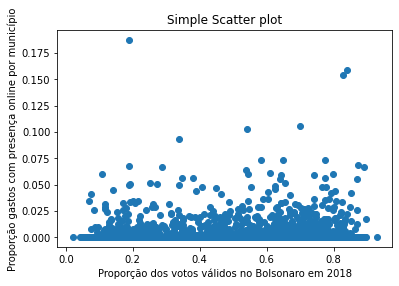

In [ ]:
import altair as alt    
alt.data_transformers.disable_max_rows()

alt.Chart(muni_uf_16).mark_bar().encode(
        alt.X('prop_categ',
          title = 'Proporção gastos com presença online',
          #bin = alt.Bin(extent = [0, 100], step = 2)
          ),
        alt.Y('count()',
          title = 'Frequência'))

alt.Chart(...)

### 2020

In [ ]:
# Total das despesas por municipio e UF
total_muni_uf_20 = d2020.groupby(['muni_code', 'uf'], as_index = False).agg({"valor": "sum"})
total_muni_uf_20 = total_muni_uf_20.sort_values(by = "valor", ascending = True)
#total_muni_uf_20.query('muni_code == 1058')

In [ ]:
# Total das despesas WEB por municipio e UF
web_muni_uf_20 = d2020.query('web == 1').groupby(['muni_code', 'uf'], as_index = False).agg({"valor": "sum"})
web_muni_uf_20 = web_muni_uf_20.sort_values(by = "valor", ascending = True)
#web_muni_uf_20.query('muni_code == 1058')
web_muni_uf_20['valor'] = web_muni_uf_20['valor'].fillna(0)

In [ ]:
muni_uf_20 = pd.merge(total_muni_uf_20, 
                      web_muni_uf_20, 
                      on = ['muni_code', 'uf'], 
                      how = "left")

In [ ]:
muni_uf_20 = muni_uf_20.rename({'valor_x':'valor_total', 'valor_y':'valor_web'}, axis = 1)
muni_uf_20['valor_web'] = muni_uf_20['valor_web'].fillna(0)
muni_uf_20.head(3)

In [ ]:
muni_uf_20['prop'] = muni_uf_20['valor_web']/muni_uf_20['valor_total']
muni_uf_20['ano2020'] = 1
classes_20 = pd.cut(x = muni_uf_20.prop, 
                 bins = [0, 0.01, 0.025, 0.05, 0.075, 0.10, 1], 
                 labels = ['0.0-1.0', '1.0-2.5', '2.5-5.0','5.0-7.5', '7.5-10', '10-100'])

muni_uf_20['prop_categ'] = classes_20
muni_uf_20.sort_values(by = "prop", ascending = False)

,muni_code,uf,valor_total,valor_web,prop,ano2020,prop_categ
236,71994,SP,30106.00,12400.0,0.411878,1,10-100
473,18112,RN,43332.05,15000.0,0.346164,1,10-100
133,86649,RS,23039.50,7800.0,0.338549,1,10-100
323,74160,PR,35436.52,11200.0,0.316058,1,10-100
155,67210,SP,24130.00,7500.0,0.310816,1,10-100
...,...,...,...,...,...,...,...
2753,45233,MG,142297.01,0.0,0.000000,1,NaN
2755,80063,SC,142498.17,0.0,0.000000,1,NaN
833,63673,SP,59021.20,0.0,0.000000,1,NaN
2757,66273,SP,142570.15,0.0,0.000000,1,NaN


In [ ]:
# Var trat e controle
muni_uf_20 = pd.merge(muni_uf_20,
                  df_cid_bolso,
                  left_on = "muni_code",
                  right_on = "CD_MUNICIPIO",
                  how = "left")

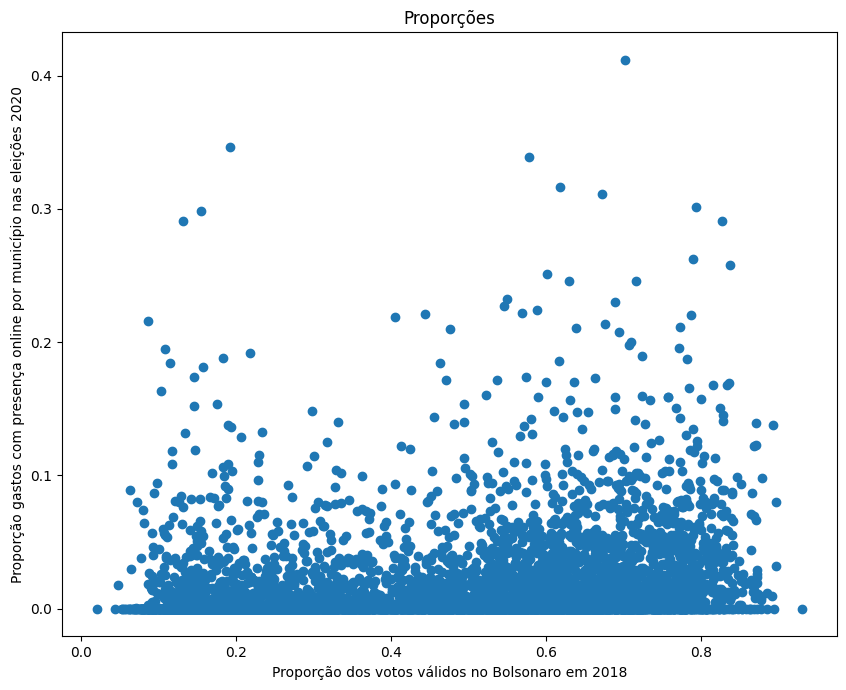

In [ ]:
x = muni_uf_20[["proporcao"]]
y = muni_uf_20[["prop"]]
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Proporções')
plt.xlabel('Proporção dos votos válidos no Bolsonaro em 2018')
plt.ylabel('Proporção gastos com presença online por município nas eleições 2020')
plt.show()

In [ ]:
muni_uf_20_bolso = muni_uf_20.query('bolso_cat == 1')
muni_uf_20_NAObolso = muni_uf_20.query('bolso_cat == 0')

In [ ]:
#muni_uf_20_bolso_count = muni_uf_20_bolso["prop_categ"].value_counts()
#muni_uf_20_bolso_count
metrics_list = ['min', 'mean', 'median', 'max', 'std']
muni_uf_20_bolso.agg({'prop': metrics_list})

,prop
min,0.000000
mean,0.025840
median,0.011798
max,0.411878
std,0.039268


In [ ]:
muni_uf_20_NAObolso.agg({'prop': metrics_list})

,prop
min,0.000000
mean,0.011550
median,0.000000
max,0.346164
std,0.027748


In [ ]:
alt.data_transformers.disable_max_rows()

alt.Chart(muni_uf_20_bolso).mark_bar().encode(
        alt.X('prop',
          title = 'Proporção gastos com presença online',
          bin = alt.Bin(extent = [0, 0.5], step = 0.02)
          ),
        alt.Y('count()',
          title = 'Frequência'))

alt.Chart(...)

In [ ]:
alt.data_transformers.disable_max_rows()

alt.Chart(muni_uf_20_NAObolso).mark_bar().encode(
        alt.X('prop',
          title = 'Proporção gastos com presença online',
          bin = alt.Bin(extent = [0, 0.5], step = 0.02)
          ),
        alt.Y('count()',
          title = 'Frequência'))

alt.Chart(...)

### (B) Mun. Bolsonaristas antes e depois de 2018

In [ ]:
bolso_16 = muni_uf_16.query('bolso_cat == 1').sort_values(by = 'prop', ascending = False)

naobolso_16 = muni_uf_16.query('bolso_cat == 0').sort_values(by = 'prop', ascending = False)
#bolso_20 = muni_uf_20_bolso

In [ ]:
metrics_list = ['min', 'mean', 'median', 'max', 'std']
naobolso_16.agg({'prop': metrics_list})

,prop
min,0.000000
mean,0.001295
median,0.000000
max,0.187689
std,0.006728


In [ ]:
alt.Chart(bolso_16).mark_bar().encode(
        alt.X('prop',
          title = 'Proporção gastos com presença online',
          bin = alt.Bin(extent = [0, 0.20], step = 0.02)
          ),
        alt.Y('count()',
          title = 'Frequência'))

alt.Chart(...)

In [ ]:
alt.Chart(naobolso_16).mark_bar().encode(
        alt.X('prop',
          title = 'Proporção gastos com presença online',
          bin = alt.Bin(extent = [0, 0.20], step = 0.02)
          ),
        alt.Y('count()',
          title = 'Frequência'))

alt.Chart(...)

### Abordagem LUCAS

In [ ]:
# Total de despesas por municipio
d2016['total_muni_uf'] = d2016.groupby(['muni_code','uf'])['value'].transform('sum')
d2016_web = d2016[d2016['web'] == 1]
# Despesas com web
d2016_web['total_muni_uf_web'] = d2016_web.groupby(['muni_code','uf'])['value'].transform('sum')


d2016_web.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,x,election,desc,date_processing,cand_seq,uf,muni_code,muni,party,cand_number,office,name_cand,cpf,cpf_vice,type_doc,number_doc,cpf_cnpf_supplier,name_supplier,name_supplier_irs,cod_econ_supplier,sector_supplier,date_expense,value,type,desc_expense,web,total_muni_uf,total_muni_uf_web
2685,220,Eleições Municipais 2016,02/06/2018 06:13:40,25389211000199,10000001187,AC,1058,BRASILÉIA,PT,13,Prefeito,FERNANDA DE SOUZA HASSEM CESAR,66529590200,43462693204,Recibo,004,00151284237,THALITA MEIRELES CAVALCANTE,THALITA MEIRELES CAVALCANTE,#NULO,#NULO,26/09/201600:00:00,1800.0,Criação e inclusão de páginas na internet,PRODUÇÃO DE VIDEO· COMUNICAÇÃO E IDENTIDADE VI...,1,163966.89,1800.0


In [ ]:
# Total de despesas por municipio
d2020['total_muni_uf'] = d2020.groupby(['muni_code','uf'])['valor'].transform('sum')
d2020_web = d2020[d2020['web'] == 1]
# Despesas com web
d2020_web['total_muni_uf_web'] = d2020_web.groupby(['muni_code','uf'])['valor'].transform('sum')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### JUNTANDO VARIÁVEIS **TOTAL DE DESPESA** E **TOTAL DE DESPESA COM WEB** NAS BASES ORIGINAIS

In [ ]:
d2016 = pd.merge(d2016, d2016_web[['muni_code','uf','total_muni_uf_web']].drop_duplicates(), 
                       how = 'left', 
                       on = ['muni_code','uf'])

In [ ]:
d2020 = pd.merge(d2020, d2020_web[['muni_code','uf','total_muni_uf_web']].drop_duplicates(), 
                       how = 'left', 
                       on = ['muni_code','uf'])

### CRIANDO VARIÁVEL **PROPORÇÃO**

In [ ]:
d2016['prop_web'] = d2016['total_muni_uf_web'] / d2016['total_muni_uf']
d2020['prop_web'] = d2020['total_muni_uf_web'] / d2020['total_muni_uf']

In [ ]:
# Métricas 
metrics_list = ['min', 'mean', 'median', 'max', 'std']
#d2020.agg({'prop_web': metrics_list})
# Quantis
d2020["prop_web"].quantile([.01, .05, .1, .25, .5, .75, .9, .95, .99])

0.01    0.000386
0.05    0.002190
0.10    0.004621
0.25    0.012851
0.50    0.029152
0.75    0.050823
0.90    0.075268
0.95    0.096665
0.99    0.157247
Name: prop_web, dtype: float64

In [ ]:
classes_16 = pd.cut(x = d2016.prop_web, 
                 bins = [0, 0.01, 0.025, 0.05, 0.075, 0.10, 1], 
                 labels = ['0.0-1.0', '1.0-2.5', '2.5-5.0','5.0-7.5', '7.5-10', '10-100'])

classes_20 = pd.cut(x = d2020.prop_web, 
                 bins = [0, 0.01, 0.025, 0.05, 0.075, 0.10, 1], 
                 labels = ['0.0-1.0', '1.0-2.5', '2.5-5.0','5.0-7.5', '7.5-10', '10-100'])

d2016['prop_web_categ'] = classes_16
d2020['prop_web_categ'] = classes_20

In [ ]:
d2016 = d2016.sort_values(by = "prop_web", ascending = False)
d2020 = d2020.sort_values(by = "prop_web", ascending = False)

In [ ]:
d2016["prop_web_categ"].value_counts()

0.0-1.0    414419
1.0-2.5     93345
2.5-5.0     21435
5.0-7.5      6010
10-100        627
7.5-10        164
Name: prop_web_categ, dtype: int64

In [ ]:
d2016["prop_web"].quantile([.01, .05, .1, .25, .5, .75, .9, .95, .99])

NameError: ignored

In [ ]:
d2020["prop_web_categ"].value_counts()

2.5-5.0    337606
1.0-2.5    252976
0.0-1.0    226364
5.0-7.5    190510
7.5-10      63984
10-100      49821
Name: prop_web_categ, dtype: int64

In [ ]:
import altair as alt    
alt.data_transformers.disable_max_rows()

alt.Chart(d2016).mark_bar().encode(
        alt.X('prop_web_categ',
          title = 'Proporção gastos com presença online',
          #bin = alt.Bin(extent = [0, 100], step = 2)
          ),
        alt.Y('count()',
          title = 'Frequência'))

In [ ]:
d2016.head(5)

,x,election,desc,date_processing,cand_seq,uf,muni_code,muni,party,cand_number,office,name_cand,cpf,cpf_vice,type_doc,number_doc,cpf_cnpf_supplier,name_supplier,name_supplier_irs,cod_econ_supplier,sector_supplier,date_expense,value,type,desc_expense,web,total_muni_uf,total_muni_uf_web,prop_web
143929,220,Eleições Municipais 2016,02/06/2018 06:13:40,25755608000157,50000020204,BA,34274,CANDEAL,DEM,25,Prefeito,EVERTON PEREIRA CERQUEIRA,2397471515,89538897587,Fatura,1600183447192,49720180544,RENATO ADELINO ALMEIDA,RENATO ADELINO ALMEIDA,#NULO,#NULO,24/08/201600:00:00,44.22,Baixa de Estimaveis - Telefone,VALOR PAGO REFERENTE A CONTA DE TELEFONIA FIXA...,0,53279.53,10000.0,0.187689
125122,220,Eleições Municipais 2016,02/06/2018 06:13:40,25755608000157,50000020204,BA,34274,CANDEAL,DEM,25,Prefeito,EVERTON PEREIRA CERQUEIRA,2397471515,89538897587,#NULO,#NULO,#NULO,#NULO,#NULO,#NULO,#NULO,29/08/201600:00:00,45.50,"Encargos financeiros, taxas bancárias e/ou op....",TARIFA DEVOLUÇÃO,0,53279.53,10000.0,0.187689
136928,220,Eleições Municipais 2016,02/06/2018 06:13:40,25755608000157,50000020204,BA,34274,CANDEAL,DEM,25,Prefeito,EVERTON PEREIRA CERQUEIRA,2397471515,89538897587,Outro,9,02397471515,EVERTON PEREIRA CERQUEIRA,EVERTON PEREIRA CERQUEIRA,#NULO,#NULO,05/09/201600:00:00,1500.00,Baixa de Estimaveis - Cessão ou locação de veí...,CAR/REBOQUE DE PLACA PJZ-3326 PARA SERVIR DE T...,0,53279.53,10000.0,0.187689
77833,220,Eleições Municipais 2016,02/06/2018 06:13:40,25755608000157,50000020204,BA,34274,CANDEAL,DEM,25,Prefeito,EVERTON PEREIRA CERQUEIRA,2397471515,89538897587,Nota Fiscal,2016000000308 - 1,02811243000135,A C PROPAGANDA LTDA.,A C PROPAGANDA LTDA.,7311400,Agências de publicidade,20/09/201600:00:00,5000.00,Criação e inclusão de páginas na internet,CRIAÇÃO DA CAMPANHA PUBLICITARIA 2016,1,53279.53,10000.0,0.187689
117898,220,Eleições Municipais 2016,02/06/2018 06:13:40,25755608000157,50000020204,BA,34274,CANDEAL,DEM,25,Prefeito,EVERTON PEREIRA CERQUEIRA,2397471515,89538897587,Nota Fiscal,000000018 - 0,07076290000104,KAKO DE VIDRO SERVICOS EIRELI - ME,KAKO DE VIDRO SERVICOS EIRELI - ME,9001902,Produção musical,13/09/201600:00:00,3000.00,Publicidade por materiais impressos,BANDEIRAS,0,53279.53,10000.0,0.187689


In [ ]:
d2016 = d2016.rename(columns = {'prop_web': 'prop_web_16'})
d2020 = d2020.rename(columns = {'prop_web': 'prop_web_20'})

d2016_p =  d2016[['muni_code', 'muni','uf','prop_web_16']].drop_duplicates()
d2016_p['ano_2016'] = 1
d2020_p =  d2020[['muni_code', 'muni','uf','prop_web_20']].drop_duplicates()
d2020_p['ano_2020'] = 1

In [ ]:
d2020_pp = pd.merge(d2016_p, d2020_p,
                    how = 'right', 
                    on = ['muni_code', 'muni','uf'])

In [ ]:
d2020_pp = d2020_pp.sort_values(by = "prop_web_16", ascending = False)
d2020_pp.head(3)

,muni_code,muni,uf,prop_web_16,ano_2016,prop_web_20,ano_2020
2948,34274,CANDEAL,BA,0.187689,1.0,NaN,1
494,84930,FAGUNDES VARELA,RS,0.158535,1.0,0.055061,1
5129,81183,SÃO PEDRO DE ALCÂNTARA,SC,0.154308,1.0,NaN,1


In [ ]:
d2020_pp = d2020_pp.sort_values(by = "prop_web_20", ascending = False)
d2020_pp.head(3)

,muni_code,muni,uf,prop_web_16,ano_2016,prop_web_20,ano_2020
0,71994,TRÊS FRONTEIRAS,SP,NaN,1.0,0.411878,1
1,18112,RIACHO DA CRUZ,RN,NaN,1.0,0.346164,1
2,86649,COXILHA,RS,NaN,1.0,0.338549,1


### Dif - Dif

In [ ]:
d2020_pp['dif_web'] = d2020_pp['prop_web_20'] - d2020_pp['prop_web_16']
d2020_pp = d2020_pp.sort_values(by = "dif_web", ascending = False)
d2020_pp.head(10)

,muni_code,muni,uf,prop_web_16,ano_2016,prop_web_20,ano_2020,dif_web
24,70173,SANTA BÁRBARA D'OESTE,SP,0.000129,1.0,0.211472,1,0.211343
19,13897,FORTALEZA,CE,0.016144,1.0,0.220762,1,0.204618
18,45837,HELIODORA,MG,0.018578,1.0,0.221758,1,0.203181
33,69213,PRAIA GRANDE,SP,0.000113,1.0,0.189302,1,0.189189
29,69914,RUBINÉIA,SP,0.017667,1.0,0.197748,1,0.180081
30,62952,CAMPOS DO JORDÃO,SP,0.017123,1.0,0.195809,1,0.178686
44,86568,CHARRUA,RS,0.002353,1.0,0.171508,1,0.169154
54,66478,LOUVEIRA,SP,0.000130,1.0,0.158952,1,0.158822
59,75043,PINHAIS,PR,0.000173,1.0,0.156624,1,0.156451
46,68179,PARANAPANEMA,SP,0.017581,1.0,0.169731,1,0.152151


### Definindo grupos **tratamento** e **controle**

In [ ]:
# Lendo os dados dos bolsonaristas 
path = "/content/drive/My Drive/INSPER/02_sem/Inf_Causal/Trabalho/dados/" 

df_cid_bolso = pd.read_csv(path + "df_psl_total.csv")
df_cid_bolso.head(2)
# Excluir algumas colunas
df_cid_bolso = df_cid_bolso[["CD_MUNICIPIO", "proporcao", "bolso_cat"]] 


In [ ]:
d2020_ppp = pd.merge(d2020_pp,
                  df_cid_bolso,
                  left_on = "muni_code",
                  right_on = "CD_MUNICIPIO",
                  how = "left")

### Métricas por grupo

### (A) Mun. Bolsonaristas x Mun. não Bolsonaristas - 2020

In [ ]:
ano2020 = d2020_ppp.query('ano_2020 == 1')
ano2020.head(3)

,muni_code,muni,uf,prop_web_16,ano_2016,prop_web_20,ano_2020,dif_web,CD_MUNICIPIO,proporcao,bolso_cat
0,70173,SANTA BÁRBARA D'OESTE,SP,0.000129,1.0,0.211472,1,0.211343,70173,0.772728,1
1,13897,FORTALEZA,CE,0.016144,1.0,0.220762,1,0.204618,13897,0.443868,0
2,45837,HELIODORA,MG,0.018578,1.0,0.221758,1,0.203181,45837,0.568839,0


### (B) Mun. Bolsonaristas antes e depois de 2018

### (C) Bolso. antes e depois de 2018 -não Bolso. antes e depois de 2018
 

In [1]:
# Despesa
#desp.query('desc_detalhe == "IMPULSIONAMENTO"')